<a href="https://colab.research.google.com/github/Vihangip/CPSC-425/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt

# Part 2: Gaussian Filtering

## *Question 1*

In [2]:
def boxfilter(n):
 assert (n % 2) != 0, "Dimension must be odd"
 filter = np.full((n, n), 1 / (n * n))
 return filter


In [3]:
boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [5]:
boxfilter(4)

AssertionError: Dimension must be odd

In [6]:
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

## *Question 2*

In [7]:
# returns n rounded up to the next odd integer
def odd(n):
  round_up = math.ceil(n)
  if (round_up % 2) == 0:
    round_up += 1
  return round_up

odd(1.6*6)

11

In [8]:
# generates a zero-centered array of values
def generate_x(n):
  mid_point = math.floor(n/2)
  x_vals = np.arange(-mid_point, mid_point + 1, 1)
  return x_vals

generate_x(11)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [9]:
# returns a 1D Gaussian filter for a given value of sigma
def gauss1d(sigma):
  filter_len = odd(sigma * 6)
  x_vals = generate_x(filter_len)
  gaussian = []

  #calculating the gaussian vals
  for x in x_vals:
    gaussian.append(math.exp(-x**2 / (2 * sigma**2)))

  #normalizing
  sum = np.sum(gaussian)
  normalized_gaussian = gaussian / sum

  return normalized_gaussian

gauss1d(1.6)

array([0.00188981, 0.01096042, 0.04301196, 0.11421021, 0.20519858,
       0.24945803, 0.20519858, 0.11421021, 0.04301196, 0.01096042,
       0.00188981])

In [10]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [11]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [12]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [13]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

## *Question 3*

In [14]:
# returns a 2D Gaussian filter for a given value of sigma
def gauss2d(sigma):
  gaussian = gauss1d(sigma)
  gaussian_2d = gaussian[np.newaxis] # converting to 2D array of same size
  transposed = gaussian_2d.T # transposing
  gaussian_convolved = signal.convolve2d(gaussian_2d, transposed) # convolution
  return gaussian_convolved


In [15]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [16]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

## *Question 4*

(a)

In [17]:
# performs convolution to the image with zero paddings
def convolve2d_manual(array, filter):
    image_height, image_width = array.shape
    filter_height, filter_width = filter.shape

    # calculate padding size
    pad_height = filter_height // 2
    pad_width = filter_width // 2

    # pad the image with zeros
    padded_image = np.pad(array, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0.0)

    # initialize output image
    output = np.zeros_like(array, dtype=np.float32)

    # flipping the filter by 180 degrees
    flipped_filter = np.rot90(filter, k=2)

    # convolution
    for i in range(image_height):
        for j in range(image_width):
            # extract current neighbourhood
            neighbourhood = padded_image[i:i + filter_height, j:j + filter_width]
            # multiplication and sum the result
            output[i, j] = np.sum(neighbourhood * flipped_filter)

    return output


In [18]:
image = np.array([[1, 0, 0, 0, 1],
                  [2, 3, 0, 8, 0],
                  [2, 0, 0, 0, 3],
                  [0, 0, 1, 0, 0]])
filter = np.array([[1/9, 1/9, 1/9],
                  [1/9, 1/9, 1/9],
                  [1/9, 1/9, 1/9]])
manual = convolve2d_manual(image, filter)
scipy = signal.convolve2d(image, filter, mode='same', boundary='fill', fillvalue=0.0)

print("manual:\n", manual)
print("SciPy:\n", scipy)

manual:
 [[0.6666667  0.6666667  1.2222222  1.         1.        ]
 [0.8888889  0.8888889  1.2222222  1.3333334  1.3333334 ]
 [0.7777778  0.8888889  1.3333334  1.3333334  1.2222222 ]
 [0.22222222 0.33333334 0.11111111 0.44444445 0.33333334]]
SciPy:
 [[0.66666667 0.66666667 1.22222222 1.         1.        ]
 [0.88888889 0.88888889 1.22222222 1.33333333 1.33333333]
 [0.77777778 0.88888889 1.33333333 1.33333333 1.22222222]
 [0.22222222 0.33333333 0.11111111 0.44444444 0.33333333]]


(b)

In [19]:
# applies Gaussian convolution to a 2D array for the given value of sigma
def gaussconvolve2d_manual(array,sigma):
  filter = gauss2d(sigma)
  gauss_convolve = convolve2d_manual(array, filter)
  return gauss_convolve

(c)

In [20]:
from PIL import Image
dog = Image.open('dog.jpg')

In [21]:
greyscale_dog = dog.convert('L') # converting to greyscale

In [22]:
im1_array = np.asarray(greyscale_dog) # converting to numpy array
print(im1_array)

[[255 255 255 ...  29  32  35]
 [255 255 254 ...  27  31  34]
 [255 255 255 ...  29  32  35]
 ...
 [ 53  66  72 ...  40  34  42]
 [ 51  67  73 ...  51  40  33]
 [ 46  66  74 ...  54  45  40]]


In [23]:
im2_array = gaussconvolve2d_manual(im1_array,3) # applying gaussian filter with sigma 3
print(im2_array)

[[ 81.720375   99.90414   115.303406  ...  12.86204    11.413181
    9.551339 ]
 [ 99.83942   122.06909   140.8996    ...  15.72098    13.951323
   11.675853 ]
 [115.11341   140.76674   162.50523   ...  18.13697    16.097645
   13.4732485]
 ...
 [ 32.555264   40.866447   48.52028   ...  31.977608   27.772308
   22.761774 ]
 [ 27.983934   35.24456    41.988846  ...  26.908657   23.3593
   19.1358   ]
 [ 22.755032   28.737751   34.33316   ...  21.493652   18.63733
   15.249158 ]]


In [24]:
im3_array = im2_array.astype(np.uint8) # converting array back to unsigned integer
im3 = Image.fromarray(im3_array) # converting result to PIL Image
im3.save('filtered_dog.png','PNG')
filtered_dog = Image.open('filtered_dog.png')

(d)

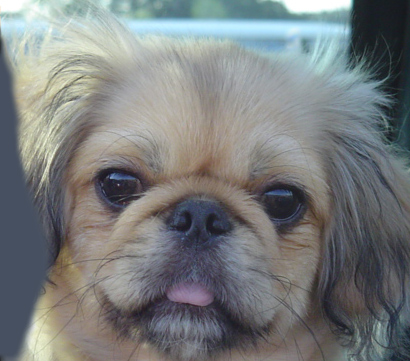

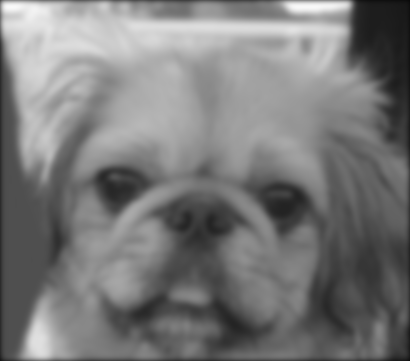

In [25]:
display(dog)
display(filtered_dog)

## *Question 5*

(a)

In [26]:
# applies Gaussian convolution to a 2D array for the given value of sigma
def gaussconvolve2d_scipy(array,sigma):
  filter = gauss2d(sigma)
  gauss_convolve = signal.convolve2d(array,filter,'same')
  return gauss_convolve

When applying the filter ‘gauss2d’ to the array with correlate2d and convolve2d, the result is the same because the filter is symetric. If it is not symetric, it will produce different results, which is why scipy has separate functions.

(b)

In [27]:
im4_array = gaussconvolve2d_scipy(im1_array,3) # applying gaussian filter with sigma 3
print(im4_array)

[[ 81.7203737   99.90413922 115.30340334 ...  12.8620398   11.41318176
    9.55133906]
 [ 99.83941435 122.06908881 140.89960229 ...  15.72097932  13.95132286
   11.67585289]
 [115.1134125  140.76673382 162.5052351  ...  18.13697105  16.09764495
   13.4732482 ]
 ...
 [ 32.55526383  40.86644766  48.52027952 ...  31.97760713  27.77230874
   22.76177442]
 [ 27.98393421  35.24456067  41.98884628 ...  26.90865616  23.35930009
   19.13579874]
 [ 22.75503093  28.73775127  34.33316003 ...  21.49365162  18.63732981
   15.24915761]]


In [28]:
im5_array = im4_array.astype(np.uint8) # converting array back to unsigned integer
im4 = Image.fromarray(im5_array) # converting result to PIL Image
im4.save('filtered_dog_scipy.png','PNG')
filtered_dog_scipy = Image.open('filtered_dog_scipy.png')

(c)

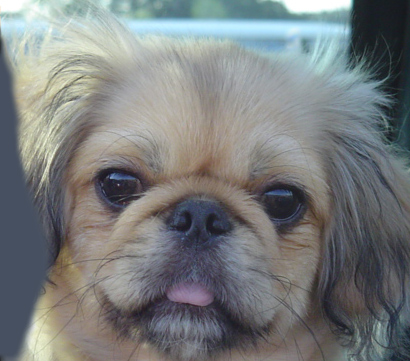

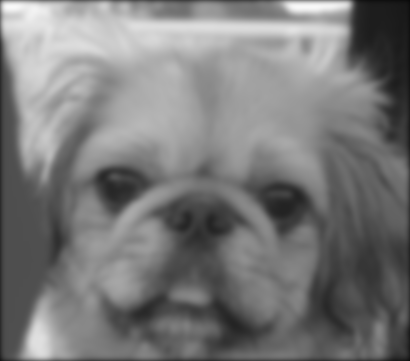

In [29]:
display(dog)
display(filtered_dog_scipy)

## *Question 6*

In [30]:
import time
# timing manual function
t1 = time.time()
gaussconvolve2d_manual(im1_array,10)
manual_duration = time.time() - t1

# timing scipy function
t1 = time.time()
gaussconvolve2d_scipy(im1_array,10)
scipy_duration = time.time() - t1

print("manual time:", manual_duration)
print("scipy time:", scipy_duration)

manual time: 2.3136324882507324
scipy time: 1.4975025653839111


The scipy function is approximately 1.5x faster than the manual function.
The scipy implementation is probably using a more optimized algorithm to iterate through the neighbourhoods and the boundaries of the image, which makes it faster. My implementation is probably slower because I am using 2 for loops.  

## *Question 7*

Instead of one 2D gaussian filter, we can express it as two 1D guassian filters, where one is for rows and one is for columns. This way, we can first convolve the filter along the rows and then along the columns. This reduces the time complexity from O(n^2) to O(n) since convolving with two 1D filters of size ( n ) requires only O(n) operations per filter per pixel

# Part 3: Hybrid Images

1.

In [31]:
# returns a blurred image array of the given image array with given sigma
def create_blurred_img(image_array, sigma):
  # filtering colour channels
  red_channel = image_array[:, :, 0]
  green_channel = image_array[:, :, 1]
  blue_channel = image_array[:, :, 2]

  # applying gaussian convolution to colour channels
  gaussconvolve_red = gaussconvolve2d_scipy(red_channel, sigma)
  gaussconvolve_green = gaussconvolve2d_scipy(green_channel, sigma)
  gaussconvolve_blue = gaussconvolve2d_scipy(blue_channel, sigma)

  # creating output image array
  blurred_image_array = np.ndarray(image_array.shape)
  blurred_image_array[:, :, 0] = gaussconvolve_red
  blurred_image_array[:, :, 1] = gaussconvolve_green
  blurred_image_array[:, :, 2] = gaussconvolve_blue

  return blurred_image_array

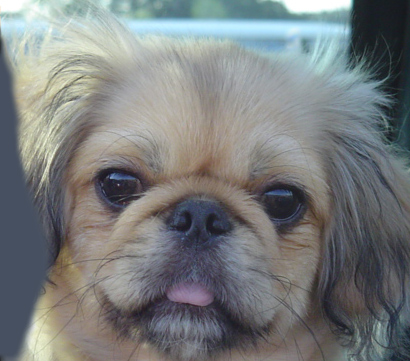

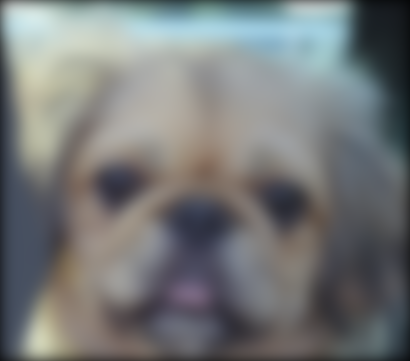

In [32]:
dog_array = np.asarray(dog)
blurred_dog_array = create_blurred_img(dog_array, 8)

im6_array = blurred_dog_array.astype(np.uint8) # converting array back to unsigned integer
im7 = Image.fromarray(im6_array) # converting result to PIL Image
im7.save('blurred_dog.png','PNG')
blurred_dog = Image.open('blurred_dog.png')

display(dog)
display(blurred_dog)

2.

In [33]:
cat = Image.open('0a_cat.bmp')
cat_array = np.asarray(cat)

# creating a low frequency Gaussian filtered cat image
blurred_cat_array = create_blurred_img(cat_array, 8)

# creating high frequency cat image
high_freq_cat_array = cat_array - blurred_cat_array
visualized_cat_array = np.clip((high_freq_cat_array + 128.0), 0.0, 255.0)

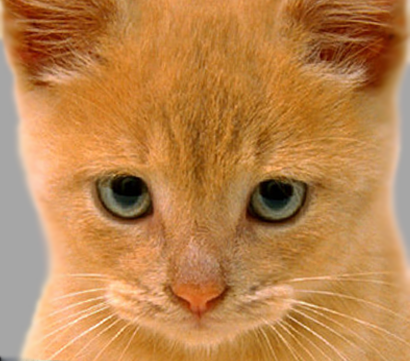

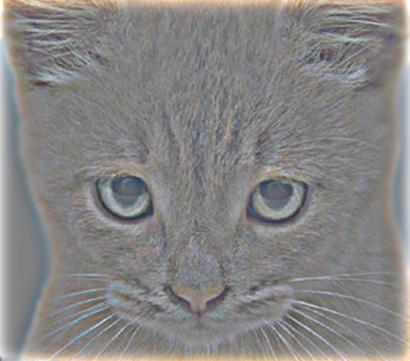

In [34]:
im6_array = visualized_cat_array.astype(np.uint8) # converting array back to unsigned integer
im7 = Image.fromarray(im6_array) # converting result to PIL Image
im7.save('high_freq_cat.png','PNG')
high_freq_cat = Image.open('high_freq_cat.png')

display(cat)
display(high_freq_cat)

3.

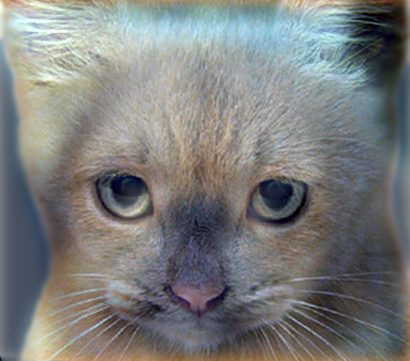

In [35]:
# adding low frequency dog and high frequency cat
hybrid_cat_dog_array =  np.clip((blurred_dog_array + high_freq_cat_array), 0.0, 255.0)

im6_array = hybrid_cat_dog_array.astype(np.uint8) # converting array back to unsigned integer
im7 = Image.fromarray(im6_array) # converting result to PIL Image
im7.save('hybrid_cat_dog.png','PNG')
hybrid_cat_dog = Image.open('hybrid_cat_dog.png')

display(hybrid_cat_dog)

In [36]:
def create_hybrid_image(first_image, second_image, sigma):
  # create blurred images of each image
  first_low_freq = create_blurred_img(first_image, sigma)
  second_low_freq = create_blurred_img(second_image, sigma)

  # create high frequency image of second image
  second_high_freq = second_image - second_low_freq

  # creating hybrid image and clipping
  hybrid_image = np.clip((first_low_freq + second_high_freq), 0.0, 255.0)

  im6_array = hybrid_image.astype(np.uint8) # converting array back to unsigned integer
  im7 = Image.fromarray(im6_array) # converting result to PIL Image
  im7.save('hybrid.png','PNG')
  hybrid_image = Image.open('hybrid.png')
  return hybrid_image


Hybrid image when sigma = 4


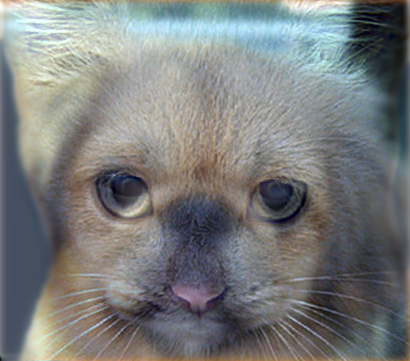

Hybrid image when sigma = 8


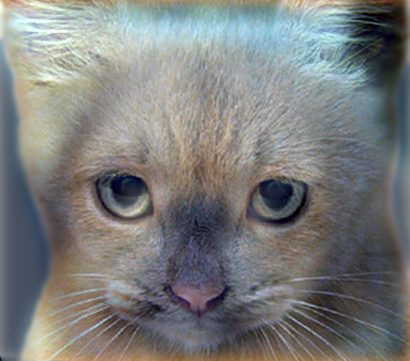

Hybrid image when sigma = 12


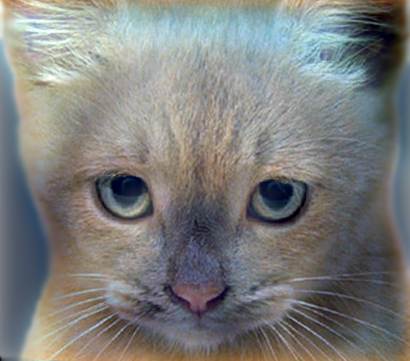

In [37]:
hybrid_cat_dog_4 = create_hybrid_image(dog_array, cat_array, 4)
print("Hybrid image when sigma = 4")
display(hybrid_cat_dog_4)

hybrid_cat_dog_8 = create_hybrid_image(dog_array, cat_array, 8)
print("Hybrid image when sigma = 8")
display(hybrid_cat_dog_8)

hybrid_cat_dog_12 = create_hybrid_image(dog_array, cat_array, 12)
print("Hybrid image when sigma = 12")
display(hybrid_cat_dog_12)

Hybrid image when sigma = 2


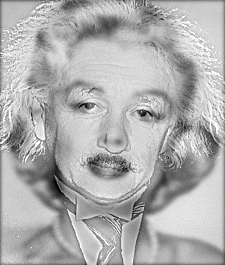

Hybrid image when sigma = 4


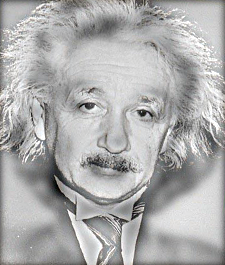

Hybrid image when sigma = 6


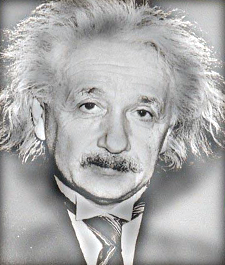

In [38]:
einstein = Image.open('2a_einstein.bmp')
einstein_array = np.asarray(einstein)
marilyn = Image.open('2b_marilyn.bmp')
marilyn_array = np.asarray(marilyn)

hybrid_einstein_marilyn_array_2 = create_hybrid_image(marilyn_array, einstein_array, 2)
print("Hybrid image when sigma = 2")
display(hybrid_einstein_marilyn_array_2)

hybrid_einstein_marilyn_array_4 = create_hybrid_image(marilyn_array, einstein_array,  4)
print("Hybrid image when sigma = 4")
display(hybrid_einstein_marilyn_array_4)

hybrid_einstein_marilyn_array_6 = create_hybrid_image(marilyn_array, einstein_array,  6)
print("Hybrid image when sigma = 6")
display(hybrid_einstein_marilyn_array_6)

Hybrid image when sigma = 1.2


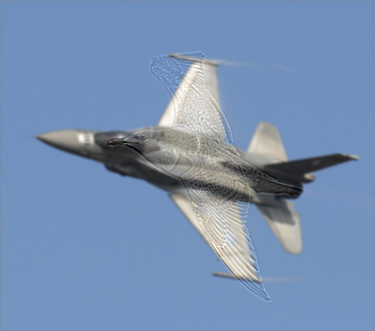

Hybrid image when sigma = 4


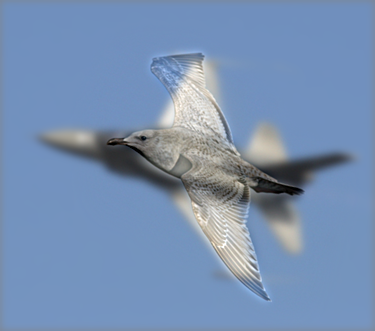

Hybrid image when sigma = 6


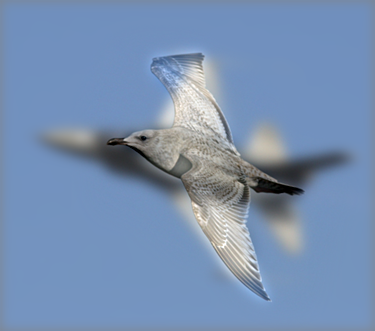

In [39]:
bird = Image.open('4a_bird.bmp')
bird_array = np.asarray(bird)
plane = Image.open('4b_plane.bmp')
plane_array = np.asarray(plane)

hybrid_bird_plane_array_1 = create_hybrid_image(plane_array, bird_array, 1.2)
print("Hybrid image when sigma = 1.2")
display(hybrid_bird_plane_array_1)

hybrid_bird_plane_array_4 = create_hybrid_image(plane_array, bird_array,  4)
print("Hybrid image when sigma = 4")
display(hybrid_bird_plane_array_4)

hybrid_bird_plane_array_6 = create_hybrid_image(plane_array, bird_array,  6)
print("Hybrid image when sigma = 6")
display(hybrid_bird_plane_array_6)

# Part 4: Playing with Different Denoising Filters

1.

Gaussion Noise

Gassion Noise Original


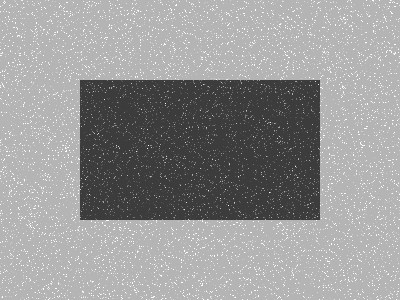

Gaussian Noise -> Gaussian Filter


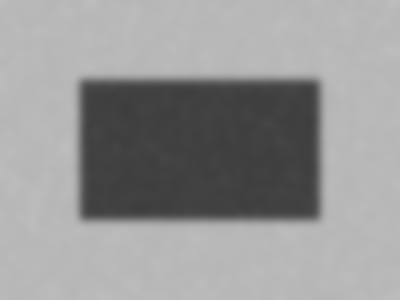

Gaussian Noise -> Bilateral Filter


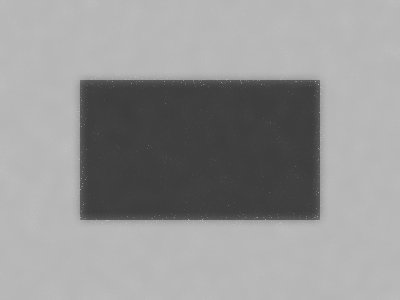

Gaussian Noise -> Median Filter


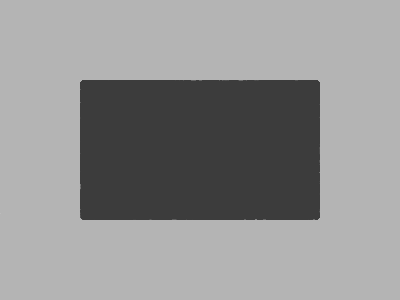

In [40]:
gauss_array = cv2.imread('box_gauss.png')
gauss_box = Image.open('box_gauss.png')
print('Gassion Noise Original')
display(gauss_box)

# gaussian filter
gauss_gauss = cv2.GaussianBlur(src=gauss_array, ksize=(0, 0), sigmaX=4.2)
gauss_guass_array = gauss_gauss.astype(np.uint8)
denoised_box = Image.fromarray(gauss_guass_array)
denoised_box.save('gauss_guass_array.png','PNG')
denoised_box = Image.open('gauss_guass_array.png')
print('Gaussian Noise -> Gaussian Filter')
display(denoised_box)

# bilateral filter
gauss_bilat = cv2.bilateralFilter(src=gauss_array, d=18, sigmaColor=240, sigmaSpace=10)
gauss_bilat_array = gauss_bilat.astype(np.uint8)
denoised_box = Image.fromarray(gauss_bilat_array)
denoised_box.save('gauss_bilat.png','PNG')
denoised_box = Image.open('gauss_bilat.png')
print('Gaussian Noise -> Bilateral Filter')
display(denoised_box)

#median filter
gauss_med = cv2.medianBlur(src=gauss_array, ksize=5)
gauss_med_array = gauss_med.astype(np.uint8)
denoised_box = Image.fromarray(gauss_med_array)
denoised_box.save('gauss_med.png','PNG')
denoised_box = Image.open('gauss_med.png')
print('Gaussian Noise -> Median Filter')
display(denoised_box)

<br></br>



Speckle Noise

Speckle Noise Original


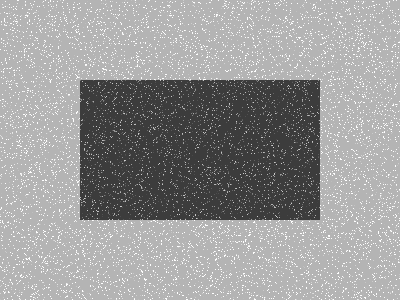

Speckle Noise -> Gaussian Filter


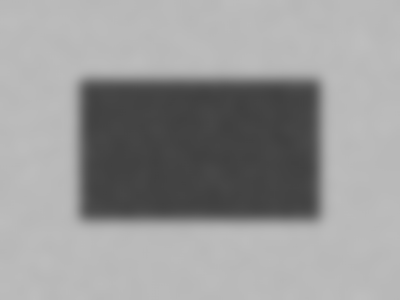

Speckle Noise -> Bilateral Filter


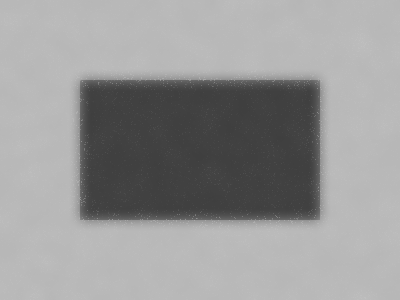

Speckle Noise -> Median Filter


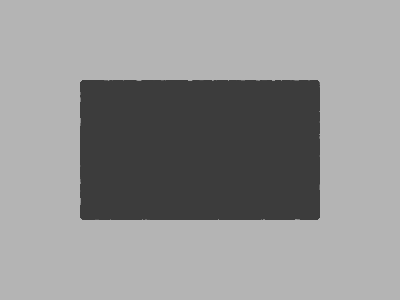

In [41]:
speckle_array = cv2.imread('box_speckle.png')
speckle_box = Image.open('box_speckle.png')
print('Speckle Noise Original')
display(speckle_box)

# gaussian filter
speckle_gauss = cv2.GaussianBlur(src=speckle_array, ksize=(0, 0), sigmaX=6)
speckle_guass_array = speckle_gauss.astype(np.uint8)
denoised_box = Image.fromarray(speckle_guass_array)
denoised_box.save('speckle_guass_array.png','PNG')
denoised_box = Image.open('speckle_guass_array.png')
print('Speckle Noise -> Gaussian Filter')
display(denoised_box)

# bilateral filter
speckle_bilat = cv2.bilateralFilter(src=speckle_array, d=25, sigmaColor=320, sigmaSpace=10)
speckle_bilat_array = speckle_bilat.astype(np.uint8)
denoised_box = Image.fromarray(speckle_bilat_array)
denoised_box.save('speckle_bilat.png','PNG')
denoised_box = Image.open('speckle_bilat.png')
print('Speckle Noise -> Bilateral Filter')
display(denoised_box)

# median filter
speckle_med = cv2.medianBlur(src=speckle_array, ksize=5)
speckle_med_array = speckle_med.astype(np.uint8)
denoised_box = Image.fromarray(speckle_med_array)
denoised_box.save('speckle_med.png','PNG')
denoised_box = Image.open('speckle_med.png')
print('Speckle Noise -> Median Filter')
display(denoised_box)

2.

Gaussion Noise

Gaussian Noise -> Gaussian Filter


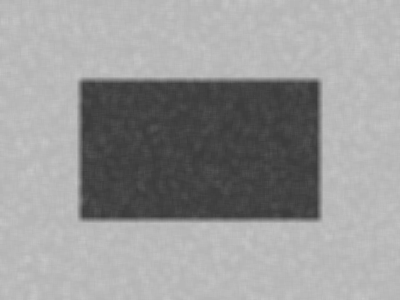

Gaussian Noise -> Bilateral Filter


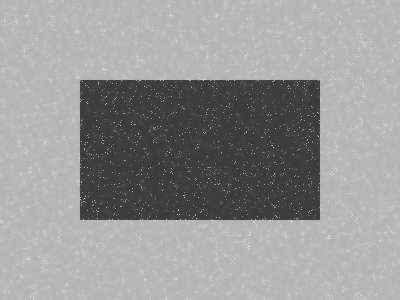

Gaussian Noise -> Median Filter


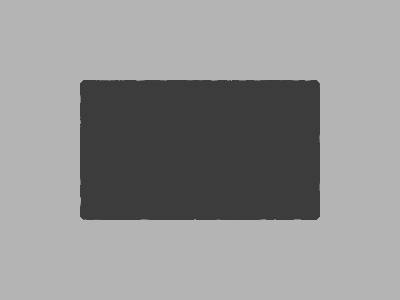

In [42]:
# gaussian filter
gauss_gauss = cv2.GaussianBlur(speckle_array, ksize=(7, 7), sigmaX=50)
gauss_guass_array = gauss_gauss.astype(np.uint8)
denoised_box = Image.fromarray(gauss_guass_array)
denoised_box.save('gauss_guass_array.png','PNG')
denoised_box = Image.open('gauss_guass_array.png')
print('Gaussian Noise -> Gaussian Filter')
display(denoised_box)

# bilateral filter
gauss_bilat = cv2.bilateralFilter(speckle_array, 7, sigmaColor=150, sigmaSpace=150)
gauss_bilat_array = gauss_bilat.astype(np.uint8)
denoised_box = Image.fromarray(gauss_bilat_array)
denoised_box.save('gauss_bilat.png','PNG')
denoised_box = Image.open('gauss_bilat.png')
print('Gaussian Noise -> Bilateral Filter')
display(denoised_box)

#median filter
gauss_med = cv2.medianBlur(speckle_array,7)
gauss_med_array = gauss_med.astype(np.uint8)
denoised_box = Image.fromarray(gauss_med_array)
denoised_box.save('gauss_med.png','PNG')
denoised_box = Image.open('gauss_med.png')
print('Gaussian Noise -> Median Filter')
display(denoised_box)

Speckle Noise

Speckle Noise -> Gaussian Filter


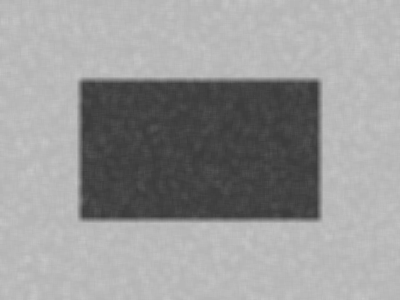

Speckle Noise -> Bilateral Filter


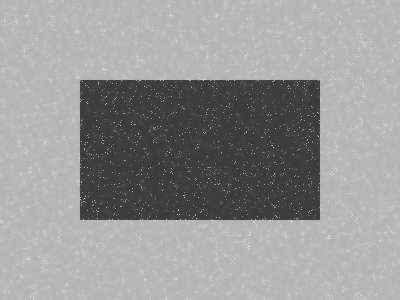

Speckle Noise -> Median Filter


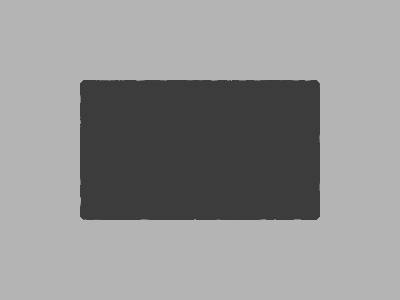

In [43]:
# gaussian filter
speckle_gauss = cv2.GaussianBlur(src=speckle_array, ksize=(7, 7), sigmaX=50)
speckle_guass_array = speckle_gauss.astype(np.uint8)
denoised_box = Image.fromarray(speckle_guass_array)
denoised_box.save('speckle_guass_array.png','PNG')
denoised_box = Image.open('speckle_guass_array.png')
print('Speckle Noise -> Gaussian Filter')
display(denoised_box)

# bilateral filter
speckle_bilat = cv2.bilateralFilter(src=speckle_array, d=7, sigmaColor=150, sigmaSpace=150)
speckle_bilat_array = speckle_bilat.astype(np.uint8)
denoised_box = Image.fromarray(speckle_bilat_array)
denoised_box.save('speckle_bilat.png','PNG')
denoised_box = Image.open('speckle_bilat.png')
print('Speckle Noise -> Bilateral Filter')
display(denoised_box)

# median filter
speckle_med = cv2.medianBlur(src=speckle_array, ksize=7)
speckle_med_array = speckle_med.astype(np.uint8)
denoised_box = Image.fromarray(speckle_med_array)
denoised_box.save('speckle_med.png','PNG')
denoised_box = Image.open('speckle_med.png')
print('Speckle Noise -> Median Filter')
display(denoised_box)


**Gaussian Filter**

Pros: No pro's of using this filter with the given values

Cons: Does not denoise properly, Does not preserve edge sharpness
      


**Bilateral Filter**

Pros: Preserves edge sharpness

Cons: Does not denoise properly

**Median Filter**

Pros: Denoises very well

Cons: Does not preserve edge sharpness